In [1]:
# Load csv file
import pandas as pd 

csv_path = r'D:\PCOS_Challenge\Old folder\PCOSGen-train\class_label.xlsx'
# Original df
df = pd.read_excel(csv_path)

In [2]:
df['Healthy'].replace({0: 'unhealthy', 1: 'healthy'}, inplace=True)
df

,imagePath,Healthy
0,100image13.jpg,healthy
1,100image2.jpg,healthy
2,100image65.jpg,unhealthy
3,100image71.jpg,unhealthy
4,100image83.jpg,unhealthy
...,...,...
3195,pco_4.jpg,healthy
3196,pco_5.jpg,unhealthy
3197,pco_6.jpg,unhealthy
3198,pco_7.jpg,unhealthy


Healthy
unhealthy    2297
healthy       903
Name: count, dtype: int64


C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


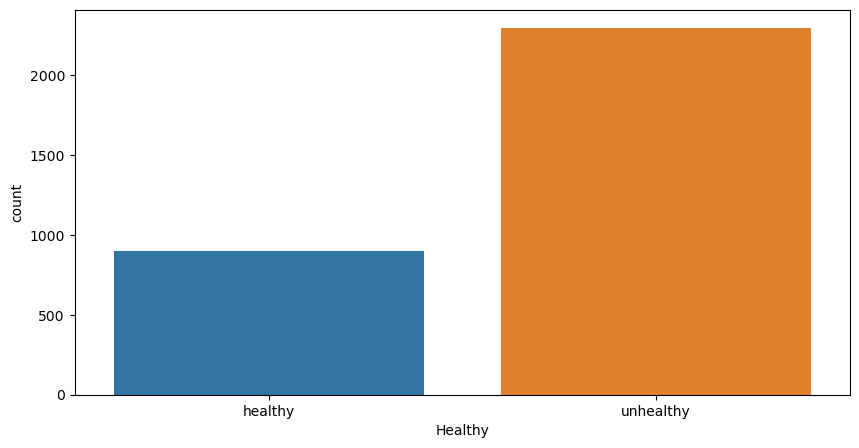

In [3]:
import seaborn as sb
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'Healthy' column
df['Healthy'] = df['Healthy'].astype('category')

print(df['Healthy'].value_counts())
plt.figure(figsize=(10,5))
sb.countplot(data=df, x='Healthy')
#plt.savefig(r'D:\PCOS_Challenge\MIA_Project\data_countplot.jpg')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_25104\2576319645.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  image_path = base_path + '\\'+data[1]+'\\'+data[0]


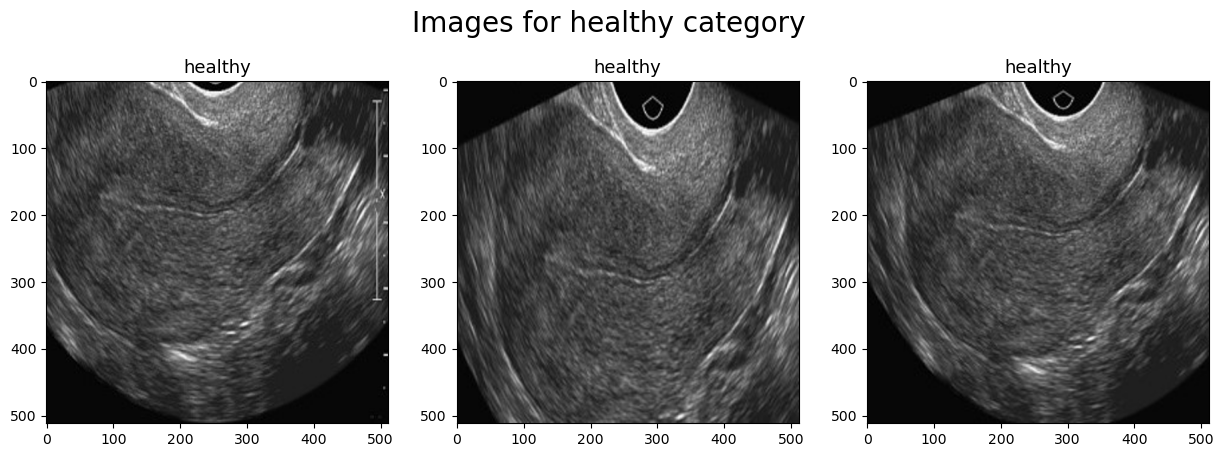

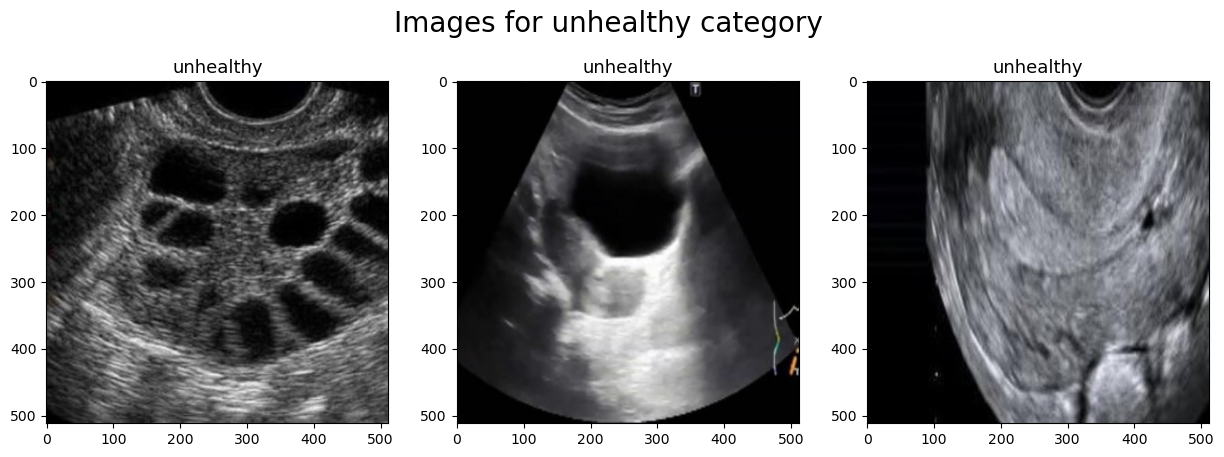

In [12]:
from PIL import Image
import os
import numpy as np

base_path = r'D:\PCOS_Challenge\New folder\train'
#categories = os.listdir(base_path)
categories = ['healthy', 'unhealthy']


for cat in categories:
    cat_specific = df[df['Healthy']==cat]
    
    index_list = cat_specific.index
    fig, ax = plt.subplots(1, 3, figsize=(15,5))
    fig.suptitle(f'Images for {cat} category', fontsize=20)
    for i in range(3):
        index = np.random.randint(0,len(index_list))
        index = index_list[index]
        data = df.iloc[index]
        #print(data)
        image_path = base_path + '\\'+data[1]+'\\'+data[0]
        
        img = np.array(Image.open(image_path).resize((512,512)))
        ax[i].imshow(img)
        ax[i].set_title(cat, fontsize=13)
    #if cat == "healthy":
        #plt.savefig(r'D:\PCOS_Challenge\MIA_Project\healthy_image_data.jpg')
    #else:
        #plt.savefig(r'D:\PCOS_Challenge\MIA_Project\unhealthy_image_data.jpg')
    plt.show()
